<a href="https://colab.research.google.com/github/erendagstan/CNN_SolidWasteIdentification/blob/main/CNN_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Convolutional Neural Networks (CNN) for Solid Waste Detection

1. Business Problem
2. Understanding the Data
3. Data Preparation
4. Modeling
5. Evaluation







# Data Understanding

The dataset we will use for this project is called TrashNet. It was prepared by students from Stanford University.
The dataset consists of six different classes. There are a total of 2527 images in the dataset, including Glass, Paper/Cardboard, Plastic, Metal, and Trash.

Distribution of images:

*   501 glass
*   594 paper
*   403 cardboard
*   482 plastic
*   410 metal
*   137 trash


The images were taken by placing them on a whiteboard and using sunlight or room lighting.
The images are in dimensions and have 3 (RGB) channels.

In [2]:
pip install imutils

In [3]:
#  libraries to be used to read and process data
import cv2
import urllib
import itertools
import numpy as np
import pandas as Pd
import seaborn as sns
import random, os, glob
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from urllib.request import urlopen

# libraries that used to turn off warnings.
import warnings
warnings. filterwarnings('ignore')

# libraries to be used for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# libraries to be used for the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint ,EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [4]:
# loading dataset
dir_path = '/content/drive/MyDrive/Garbage classification'

In [5]:
# declare target size and label variable
target_size = (224,224)

waste_labels = {'cardboard':0,'glass':1,'metal':2,'paper':3,'plastic':4,'trash':5}

In [6]:
def load_datasets(path):
  """
  It reads the image in the directory containing the images and creates tags.
  Parameters :
  path: Refers to the directory where the images are located.
  Return:
  x: Holds matrix information of images.
  labels: List containing the class information to which the image belongs.
  """
  x = []
  labels = []

  # It lists and sorts the images in the path we send.
  image_paths = sorted(list(paths.list_images(path)))

  for image_path in image_paths :
    # Images in the specified path are read with the openCV library.
    img = cv2.imread(image_path)
    # Read images are rescaled according to the initially specified target_size.
    img = cv2.resize(img, target_size)
    # Scaled images are added to the x list.
    x.append(img)
    # When each path is separated by the ' / ' expression, the second to last element of the returned list represents labe11.
    label = image_path.split(os.path.sep)[-2]
    # Appending labels with waste labels key - value
    labels.append(waste_labels[label])


  # The data set is shuffled randomly.
  x, labels = shuffle(x, labels, random_state=42)
  # Size and Class Information is reported.
  print(f"X size: {np.array(x).shape}")
  print(f"Label class length: {len(np.unique(labels))} Observation Length: {len(labels)}")
  return x, labels




In [7]:
x, labels = load_datasets(dir_path)

X size: (2537, 224, 224, 3)
Label class length: 6 Observation Length: 2537


In [8]:
# keeping image dimensions
input_shape = (np.array(x[0]).shape[1], np.array(x[0]).shape[1],3)
print(input_shape)

(224, 224, 3)


In [9]:
# visualizing image
def visualize_image(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(np.array(list(waste_labels.keys()))[to_categorical(labels,num_classes=6)[n]==1][0].title())
    plt.axis('off')

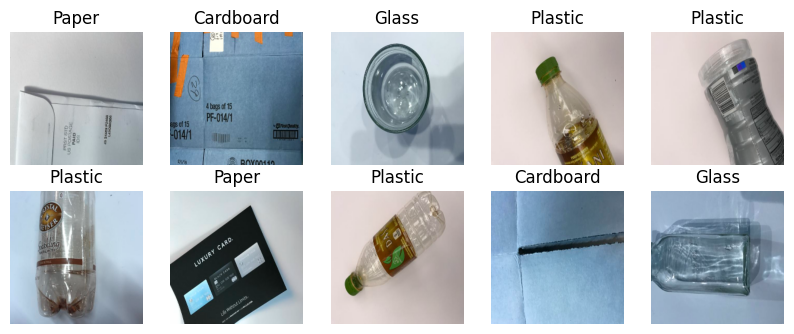

In [10]:
visualize_image(x,labels)

# Data Preparation

In [11]:
# data augmentation
# We define a generator for the train data set.
train = ImageDataGenerator(horizontal_flip=True,
                           vertical_flip=True,
                           validation_split=0.1,
                           rescale=1./255,
                           shear_range=0.1,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1)

# We define a generator for the test data set.
test = ImageDataGenerator(rescale=1/255,
                        validation_split=0.1)

In [12]:
train_generator = train.flow_from_directory(directory=dir_path,
                                            target_size=(target_size),
                                            class_mode='categorical',
                                            subset='training')

test_generator = test.flow_from_directory(directory=dir_path,
                                          target_size=(target_size),
                                          batch_size=251,
                                          class_mode='categorical',
                                          subset='validation')

Found 2285 images belonging to 6 classes.
Found 252 images belonging to 6 classes.


# Modelling
1.   Sequential
2.   Convolution Layer, Conv2D
3.   Pooling Layer (down sampling)
4.   Activation Layer
5.   Flattening Layer
6.   Dense Layer
7.   Dropout Layer





In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',input_shape=(input_shape),activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2)) # to prevent overfitting
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=6,activation='softmax')) # it is a 6-class classification problem, unit=6
# class > 2 -> softmax | class <= 2 -> sigmoid



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 32)        0

# Preparation of optimization and evaluation metrics

In [15]:
model.compile(loss = 'categorical_crossentropy', # because target class > 2, if categoricall class==2, we use binary_crossentropy
              optimizer ='adam', # alternatively we can use 'scd'
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'acc'])

In [16]:
callbacks = [EarlyStopping(monitor='val_loss', patience=50, verbose =1, mode='min'),
             ModelCheckpoint(filepath='mymodel.h5', monitor='val_loss', mode='min', save_best_only=True, save_weight_only=False, verbose = 1)]


# Training the model

In [ ]:
history = model.fit_generator(generator=train_generator,
                              epochs = 100,
                              validation_data=test_generator,
                              callbacks=callbacks,
                              workers = 4,
                              steps_per_epoch = 2276//32,
                              validation_steps = 251//32)

Accuracy & Loss Graphs

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'],label='Training Accuracy')
plt.plot(history.history['val_acc'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy',fontsize=16)


plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss',fontsize=16)
plt.show()

# Evaluation

In [ ]:
loss, precision, recall, acc = model.evaluate(test_generator, batch_size = 32)

In [ ]:
print('\nTest accuracy: %.1f%%', % (100.0 * acc))
print('\nTest loss: %.1f%%', % (100.0 * loss))
print('\nTest precision: %.1f%%', % (100.0 * precision))
print('\nTest recall: %.1f%%', % (100.0 * recall))

In [ ]:
# classification report
x_test, y_test = test_generator.next()

y_pred = model.predict(x_test)

y_pred = np.argmax(y_pred, axis =1)

y_test = np.argmax(y_test, axis =1)

In [ ]:
target_names = list(waste_labels.keys())

In [ ]:
print(classification_report(y_test, y_pred, target_names = target_names))

In [ ]:
# confusion matrix

cm = confusion_matrix(y_test,y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize= False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(8,6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt='.2f' if normalize else 'd'
  thresh = cm.max() / 2,
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt),
             horizontalalignment='center',
             color ='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold')
    plt.xlabel('Predicted label', fontweight='bold')

In [ ]:
plot_confusion_matrix(cm, waste_labels.keys(),
                      title='Confusion Matrix',
                      cmap=plt.cm.OrRd)

In [ ]:
waste_labels = {0:'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5:'trash'}

In [ ]:
def model_testing(path):
  img = image.load_img(path, target_size=(target_size))
  img = image.img_to_array(img, dtype=np.uint8)
  img = np.array(img) / 255.0
  p = model.predict(img.reshape(1,224,224,3))
  predicted_class = np.argmax(p[0])

  return img, p, predicted_class

In [ ]:
img1,p1,predicted_class = model_testing('/content/drive/MyDrive/Garbage classification/metal/metal1100.jpg')